# Hotel Reservation Cancellation
## Homework Long Holiday Challenge - Milestone Project Data Science Afternoon Batch 2
by **Muhammad Hilman Maulana** | last_update: July 2022

### Our Understanding

Tujuan dari Final Project ini adalah untuk memprediksi reservasi hotel (Hotel Reservation Cancellation) dengan target apakah user cancel booking (1) atau tidak cancel (0) dengan menggunakan beberapa model machine learning.
Berikut tahapan pengerjaan:
1. Data Cleaning dan Preprocessing (Tipe-tipe data, Describe feature data, Lakukan Handling Missing Value, dan Handling outliers)
2. EDA (Tamu berasal dari mana?, Berapa harga room per night? Ada perbedaan hargakah?, Berapa lama tamu tinggal di hotel?, Ada market segment?, Berapa banyak booking yang dicancel/tidak dicancel?)
3. Model Building dan Hyperparameter Tuning
   (A. Train 80% dan Test 20% dengan random_state parameter diisi secara eksplisit (random_state = 41), B. Melakukan encoding di mana data categorical diubah menjadi numerical agar ML dapat memprosesnya, C. Menampilkan confusion matrix dan classification report setiap model yang digunakan, E. Melakuakan hyperparameter dengan menggunakan RandomizedSearchCV)
4. Model Evaluation

### Data Source

Data yang digunakan dapat diakses melalui [Hotel Reservation Cancellation](https://www.kaggle.com/datasets/jessemostipak/hotel-booking-demand) yang terdiri beberapa kolom seperti `'lead_time'`, `'customer_type'`, `'adr'`, `'reservation_status'`, `'reservation_status_date'`, `'agent'`, dll. Deskripsi lengkap terkait masing-masing kolom pada dataset tersebut dapat diakses pada [Data Desc](https://www.sciencedirect.com/science/article/pii/S2352340918315191#t0040)

In [2]:
#import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
plt.style.use("seaborn")

In [2]:
#import Dataset
data = pd.read_csv("DataSet\hotel_booking_city_hotel.csv")

In [3]:
data

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,City Hotel,0,6,2015,July,27,1,0,2,1,...,No Deposit,6.0,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-03
1,City Hotel,1,88,2015,July,27,1,0,4,2,...,No Deposit,9.0,NaN,0,Transient,76.50,0,1,Canceled,2015-07-01
2,City Hotel,1,65,2015,July,27,1,0,4,1,...,No Deposit,9.0,NaN,0,Transient,68.00,0,1,Canceled,2015-04-30
3,City Hotel,1,92,2015,July,27,1,2,4,2,...,No Deposit,9.0,NaN,0,Transient,76.50,0,2,Canceled,2015-06-23
4,City Hotel,1,100,2015,July,27,2,0,2,2,...,No Deposit,9.0,NaN,0,Transient,76.50,0,1,Canceled,2015-04-02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79325,City Hotel,0,23,2017,August,35,30,2,5,2,...,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06
79326,City Hotel,0,102,2017,August,35,31,2,5,3,...,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07
79327,City Hotel,0,34,2017,August,35,31,2,5,2,...,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07
79328,City Hotel,0,109,2017,August,35,31,2,5,2,...,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07


In [4]:
pd.set_option("display.max_columns", None)

In [5]:
data.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,City Hotel,0,6,2015,July,27,1,0,2,1,0.0,0,HB,PRT,Offline TA/TO,TA/TO,0,0,0,A,A,0,No Deposit,6.0,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-03
1,City Hotel,1,88,2015,July,27,1,0,4,2,0.0,0,BB,PRT,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,9.0,NaN,0,Transient,76.5,0,1,Canceled,2015-07-01
2,City Hotel,1,65,2015,July,27,1,0,4,1,0.0,0,BB,PRT,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,9.0,NaN,0,Transient,68.0,0,1,Canceled,2015-04-30
3,City Hotel,1,92,2015,July,27,1,2,4,2,0.0,0,BB,PRT,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,9.0,NaN,0,Transient,76.5,0,2,Canceled,2015-06-23
4,City Hotel,1,100,2015,July,27,2,0,2,2,0.0,0,BB,PRT,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,9.0,NaN,0,Transient,76.5,0,1,Canceled,2015-04-02


## Data Cleaning dan Preprocessing

##### A. Tipe dan Describe Data

In [6]:
data.shape

(79330, 32)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79330 entries, 0 to 79329
Data columns (total 32 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   hotel                           79330 non-null  object 
 1   is_canceled                     79330 non-null  int64  
 2   lead_time                       79330 non-null  int64  
 3   arrival_date_year               79330 non-null  int64  
 4   arrival_date_month              79330 non-null  object 
 5   arrival_date_week_number        79330 non-null  int64  
 6   arrival_date_day_of_month       79330 non-null  int64  
 7   stays_in_weekend_nights         79330 non-null  int64  
 8   stays_in_week_nights            79330 non-null  int64  
 9   adults                          79330 non-null  int64  
 10  children                        79326 non-null  float64
 11  babies                          79330 non-null  int64  
 12  meal                            

In [8]:
# Cek tipe data
data.dtypes

hotel                              object
is_canceled                         int64
lead_time                           int64
arrival_date_year                   int64
arrival_date_month                 object
arrival_date_week_number            int64
arrival_date_day_of_month           int64
stays_in_weekend_nights             int64
stays_in_week_nights                int64
adults                              int64
children                          float64
babies                              int64
meal                               object
country                            object
market_segment                     object
distribution_channel               object
is_repeated_guest                   int64
previous_cancellations              int64
previous_bookings_not_canceled      int64
reserved_room_type                 object
assigned_room_type                 object
booking_changes                     int64
deposit_type                       object
agent                             

In [9]:
data.dtypes

hotel                              object
is_canceled                         int64
lead_time                           int64
arrival_date_year                   int64
arrival_date_month                 object
arrival_date_week_number            int64
arrival_date_day_of_month           int64
stays_in_weekend_nights             int64
stays_in_week_nights                int64
adults                              int64
children                          float64
babies                              int64
meal                               object
country                            object
market_segment                     object
distribution_channel               object
is_repeated_guest                   int64
previous_cancellations              int64
previous_bookings_not_canceled      int64
reserved_room_type                 object
assigned_room_type                 object
booking_changes                     int64
deposit_type                       object
agent                             

In [10]:
data.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,79330.000000,79330.000000,79330.000000,79330.000000,79330.000000,79330.000000,79330.000000,79330.000000,79326.000000,79330.000000,79330.000000,79330.000000,79330.000000,79330.000000,71199.000000,3689.000000,79330.000000,79330.000000,79330.000000,79330.000000
mean,0.417270,109.735724,2016.174285,27.177449,15.786625,0.795185,2.182957,1.850977,0.091370,0.004941,0.025615,0.079743,0.132371,0.187369,28.144721,145.271618,3.226774,105.304465,0.024367,0.546918
std,0.493111,110.948526,0.699181,13.398523,8.728451,0.885026,1.456416,0.509292,0.372177,0.084323,0.157983,0.415472,1.693411,0.608620,56.432181,119.774134,20.870890,43.602954,0.154919,0.780776
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,8.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,23.000000,2016.000000,17.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,40.000000,0.000000,79.200000,0.000000,0.000000
50%,0.000000,74.000000,2016.000000,27.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,91.000000,0.000000,99.900000,0.000000,0.000000
75%,1.000000,163.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,17.000000,219.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,629.000000,2017.000000,53.000000,31.000000,16.000000,41.000000,4.000000,3.000000,10.000000,1.000000,21.000000,72.000000,21.000000,509.000000,497.000000,391.000000,5400.000000,3.000000,5.000000


In [11]:
data.describe(include="object")

,hotel,arrival_date_month,meal,country,market_segment,distribution_channel,reserved_room_type,assigned_room_type,deposit_type,customer_type,reservation_status,reservation_status_date
count,79330,79330,79330,79306,79330,79330,79330,79330,79330,79330,79330,79330
unique,1,12,4,166,8,5,8,9,3,4,3,864
top,City Hotel,August,BB,PRT,Online TA,TA/TO,A,A,No Deposit,Transient,Check-Out,2015-10-21
freq,79330,8983,62305,30960,38748,68945,62595,57007,66442,59404,46228,1416


##### B. Missing Values

In [12]:
data.isnull().sum()

hotel                                 0
is_canceled                           0
lead_time                             0
arrival_date_year                     0
arrival_date_month                    0
arrival_date_week_number              0
arrival_date_day_of_month             0
stays_in_weekend_nights               0
stays_in_week_nights                  0
adults                                0
children                              4
babies                                0
meal                                  0
country                              24
market_segment                        0
distribution_channel                  0
is_repeated_guest                     0
previous_cancellations                0
previous_bookings_not_canceled        0
reserved_room_type                    0
assigned_room_type                    0
booking_changes                       0
deposit_type                          0
agent                              8131
company                           75641


In [13]:
# Ubah dalam bentuk persentase
data.isnull().sum()/data.shape[0]*100

hotel                              0.000000
is_canceled                        0.000000
lead_time                          0.000000
arrival_date_year                  0.000000
arrival_date_month                 0.000000
arrival_date_week_number           0.000000
arrival_date_day_of_month          0.000000
stays_in_weekend_nights            0.000000
stays_in_week_nights               0.000000
adults                             0.000000
children                           0.005042
babies                             0.000000
meal                               0.000000
country                            0.030253
market_segment                     0.000000
distribution_channel               0.000000
is_repeated_guest                  0.000000
previous_cancellations             0.000000
previous_bookings_not_canceled     0.000000
reserved_room_type                 0.000000
assigned_room_type                 0.000000
booking_changes                    0.000000
deposit_type                    

Terdapat 4 missing values, yaitu kolom children, country, agent, dan company.
Karena jumlah missing value pd kolom children dan country sangat sedikit jika dibandingkan dengan total data, maka saya memilih untuk menghapus baris/row yg mengandung NaN di kolom tsb.
Karena agent dan company keduanya me-refers ke "ID", artinya, NaN pd kolom tersebut mereka tidak mem-booking hotel atas nama agent dan tidak dibayar oleh suatu company tertentu. Untuk itu, saya menggantinya dengan 0 meski pd akhirnya kedua kolom tsb tidak masuk dalam penentuan parameter model.

In [14]:
# handling MV untuk agent 
data["agent"] = data['agent'].fillna(0)

In [15]:
# handling MV untuk company
data["company"] = data["company"].fillna(0)

In [16]:
data.isna().sum()

hotel                              0
is_canceled                        0
lead_time                          0
arrival_date_year                  0
arrival_date_month                 0
arrival_date_week_number           0
arrival_date_day_of_month          0
stays_in_weekend_nights            0
stays_in_week_nights               0
adults                             0
children                           4
babies                             0
meal                               0
country                           24
market_segment                     0
distribution_channel               0
is_repeated_guest                  0
previous_cancellations             0
previous_bookings_not_canceled     0
reserved_room_type                 0
assigned_room_type                 0
booking_changes                    0
deposit_type                       0
agent                              0
company                            0
days_in_waiting_list               0
customer_type                      0
a

In [17]:
data

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,City Hotel,0,6,2015,July,27,1,0,2,1,0.0,0,HB,PRT,Offline TA/TO,TA/TO,0,0,0,A,A,0,No Deposit,6.0,0.0,0,Transient,0.00,0,0,Check-Out,2015-07-03
1,City Hotel,1,88,2015,July,27,1,0,4,2,0.0,0,BB,PRT,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,9.0,0.0,0,Transient,76.50,0,1,Canceled,2015-07-01
2,City Hotel,1,65,2015,July,27,1,0,4,1,0.0,0,BB,PRT,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,9.0,0.0,0,Transient,68.00,0,1,Canceled,2015-04-30
3,City Hotel,1,92,2015,July,27,1,2,4,2,0.0,0,BB,PRT,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,9.0,0.0,0,Transient,76.50,0,2,Canceled,2015-06-23
4,City Hotel,1,100,2015,July,27,2,0,2,2,0.0,0,BB,PRT,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,9.0,0.0,0,Transient,76.50,0,1,Canceled,2015-04-02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79325,City Hotel,0,23,2017,August,35,30,2,5,2,0.0,0,BB,BEL,Offline TA/TO,TA/TO,0,0,0,A,A,0,No Deposit,394.0,0.0,0,Transient,96.14,0,0,Check-Out,2017-09-06
79326,City Hotel,0,102,2017,August,35,31,2,5,3,0.0,0,BB,FRA,Online TA,TA/TO,0,0,0,E,E,0,No Deposit,9.0,0.0,0,Transient,225.43,0,2,Check-Out,2017-09-07
79327,City Hotel,0,34,2017,August,35,31,2,5,2,0.0,0,BB,DEU,Online TA,TA/TO,0,0,0,D,D,0,No Deposit,9.0,0.0,0,Transient,157.71,0,4,Check-Out,2017-09-07
79328,City Hotel,0,109,2017,August,35,31,2,5,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,89.0,0.0,0,Transient,104.40,0,0,Check-Out,2017-09-07


In [18]:
# handle MV utk kolom children 
data.dropna(subset=["children"], inplace=True)

In [19]:
# handle MV utk kolom country
data.dropna(subset=["country"], inplace=True)

In [20]:
data.isna().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
agent                             0
company                           0
days_in_waiting_list              0
customer_type                     0
adr                         

In [21]:
data

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,City Hotel,0,6,2015,July,27,1,0,2,1,0.0,0,HB,PRT,Offline TA/TO,TA/TO,0,0,0,A,A,0,No Deposit,6.0,0.0,0,Transient,0.00,0,0,Check-Out,2015-07-03
1,City Hotel,1,88,2015,July,27,1,0,4,2,0.0,0,BB,PRT,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,9.0,0.0,0,Transient,76.50,0,1,Canceled,2015-07-01
2,City Hotel,1,65,2015,July,27,1,0,4,1,0.0,0,BB,PRT,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,9.0,0.0,0,Transient,68.00,0,1,Canceled,2015-04-30
3,City Hotel,1,92,2015,July,27,1,2,4,2,0.0,0,BB,PRT,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,9.0,0.0,0,Transient,76.50,0,2,Canceled,2015-06-23
4,City Hotel,1,100,2015,July,27,2,0,2,2,0.0,0,BB,PRT,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,9.0,0.0,0,Transient,76.50,0,1,Canceled,2015-04-02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79325,City Hotel,0,23,2017,August,35,30,2,5,2,0.0,0,BB,BEL,Offline TA/TO,TA/TO,0,0,0,A,A,0,No Deposit,394.0,0.0,0,Transient,96.14,0,0,Check-Out,2017-09-06
79326,City Hotel,0,102,2017,August,35,31,2,5,3,0.0,0,BB,FRA,Online TA,TA/TO,0,0,0,E,E,0,No Deposit,9.0,0.0,0,Transient,225.43,0,2,Check-Out,2017-09-07
79327,City Hotel,0,34,2017,August,35,31,2,5,2,0.0,0,BB,DEU,Online TA,TA/TO,0,0,0,D,D,0,No Deposit,9.0,0.0,0,Transient,157.71,0,4,Check-Out,2017-09-07
79328,City Hotel,0,109,2017,August,35,31,2,5,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,89.0,0.0,0,Transient,104.40,0,0,Check-Out,2017-09-07


##### C. Handle Outliers

In [22]:
data.head(3)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,City Hotel,0,6,2015,July,27,1,0,2,1,0.0,0,HB,PRT,Offline TA/TO,TA/TO,0,0,0,A,A,0,No Deposit,6.0,0.0,0,Transient,0.0,0,0,Check-Out,2015-07-03
1,City Hotel,1,88,2015,July,27,1,0,4,2,0.0,0,BB,PRT,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,9.0,0.0,0,Transient,76.5,0,1,Canceled,2015-07-01
2,City Hotel,1,65,2015,July,27,1,0,4,1,0.0,0,BB,PRT,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,9.0,0.0,0,Transient,68.0,0,1,Canceled,2015-04-30


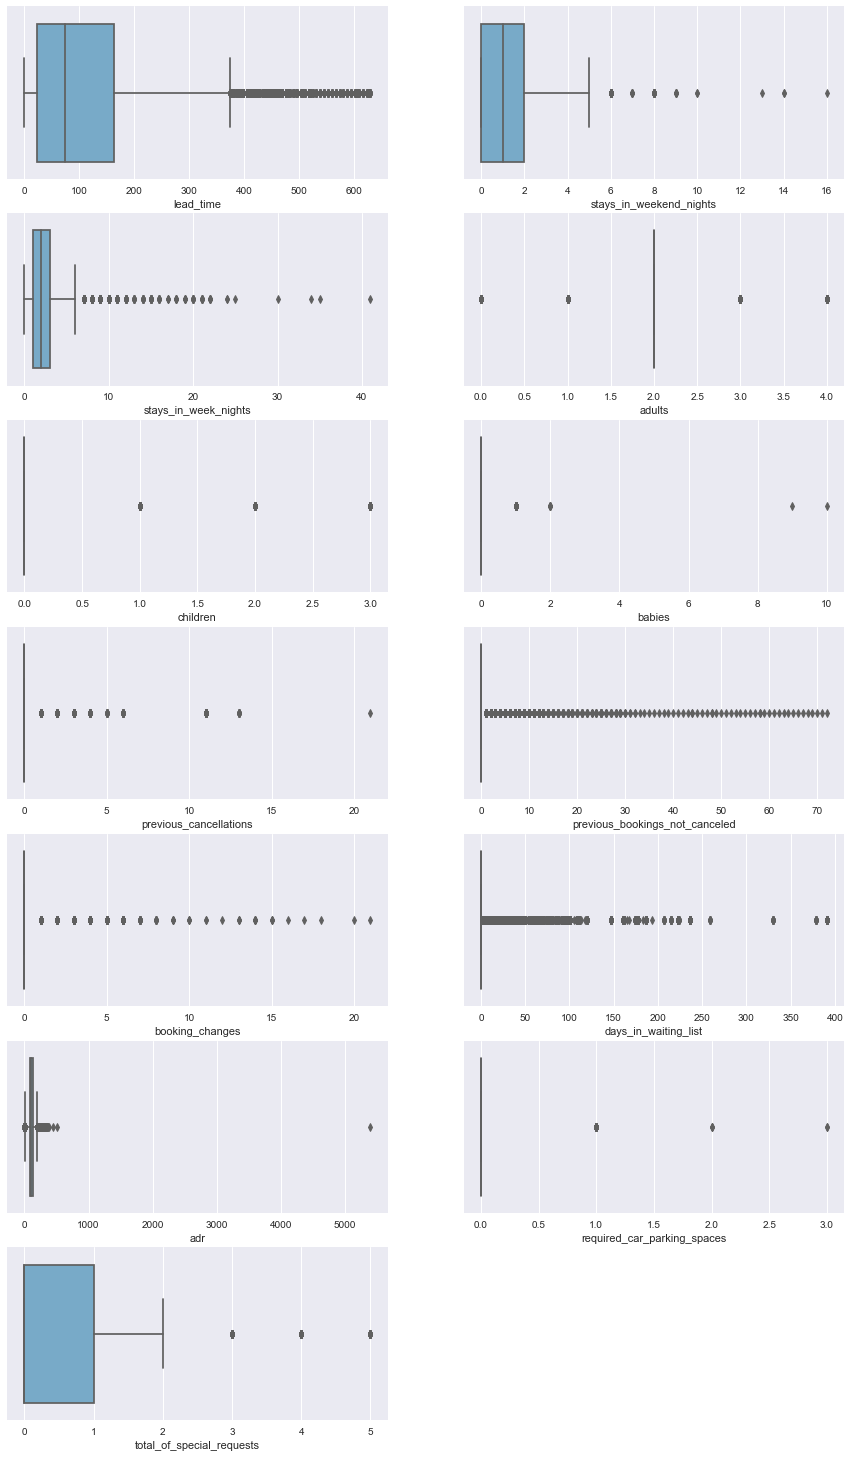

In [23]:
# hanya dipilih kolom2 tertentu saja
edd_kolom = ["lead_time", "stays_in_weekend_nights", "stays_in_week_nights", "adults", "children", "babies",
             "previous_cancellations", "previous_bookings_not_canceled", "booking_changes","days_in_waiting_list",
             "adr","required_car_parking_spaces", "total_of_special_requests"]

plt.figure(figsize=(15,26))
j = 1
while j < len(edd_kolom) :
    for i in edd_kolom :
        plt.subplot(7,2,j)
        sns.boxplot(data[i], palette="Blues")
        j=j+1  

In [24]:
# Adr dengan nilai lebih dari 5000 akan diganti dengan batas upper bound
data[data["adr"]>=5000]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
8455,City Hotel,1,35,2016,March,13,25,0,1,2,0.0,0,BB,PRT,Offline TA/TO,TA/TO,0,0,0,A,A,1,Non Refund,12.0,0.0,0,Transient,5400.0,0,0,Canceled,2016-02-19


In [25]:
q1 = data["adr"].quantile(0.25)
q3 = data["adr"].quantile(0.75)
IQR = (q3-q1)

In [26]:
UB = q3 + 1.5*IQR
UB

196.2

In [27]:
# Adr dengan nilai lebih dari 5000 akan diganti dengan batas upper bound
data.loc[data.adr > 5000, "adr"] = UB

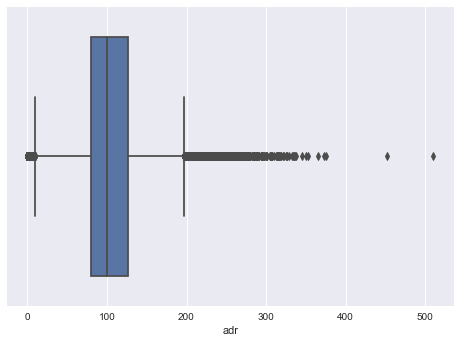

In [28]:
#cek apakah sudah terganti?
sns.boxplot(data["adr"])

In [29]:
data[data["adr"]<0]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date


Dalam kasus ini, tidak dilakukan terlalu banyak handling outliers. Data2 yang merupakan outliers tersebut memupakan data actualnya.

## Exploratory Data Analysis

##### A. Tamu berasal dari mana?
*jawaban tidak dipisahkan antara cancel booking dan tidak cancel booking, visualisasi hanya menampilkan negara dengan jumlah count lebih dari rata2nya.

In [30]:
data["country"].unique()

array(['PRT', 'ITA', 'ESP', 'DEU', 'FRA', 'NLD', 'GBR', 'ROU', 'BRA',
       'SWE', 'AUT', 'AGO', 'BEL', 'CHE', 'NOR', 'RUS', 'ISR', 'IRL',
       'POL', 'CHN', 'USA', 'MAR', 'AUS', 'MOZ', 'TUN', 'DNK', 'MEX',
       'GRC', 'DZA', 'COL', 'LUX', 'CN', 'LVA', 'FIN', 'HRV', 'STP',
       'BGR', 'UKR', 'VEN', 'TWN', 'IRN', 'KOR', 'TUR', 'BLR', 'JPN',
       'CZE', 'HUN', 'AZE', 'KAZ', 'IND', 'NZL', 'IDN', 'LTU', 'LBN',
       'SRB', 'SVN', 'SVK', 'MYS', 'CMR', 'CHL', 'ARG', 'SGP', 'SEN',
       'PER', 'EGY', 'SAU', 'KNA', 'JOR', 'ZAF', 'THA', 'KWT', 'LKA',
       'ALB', 'ETH', 'PHL', 'ARE', 'ECU', 'OMN', 'IRQ', 'AND', 'CPV',
       'MUS', 'HND', 'NGA', 'RWA', 'EST', 'PAK', 'GEO', 'GIB', 'ZMB',
       'QAT', 'KHM', 'HKG', 'MCO', 'BGD', 'ISL', 'UZB', 'URY', 'IMN',
       'TJK', 'ARM', 'MDV', 'NIC', 'GGY', 'BEN', 'MAC', 'CYP', 'VGB',
       'MLT', 'CRI', 'TZA', 'JEY', 'GAB', 'MKD', 'BIH', 'VNM', 'GHA',
       'TMP', 'GLP', 'KEN', 'PRI', 'DOM', 'LIE', 'GNB', 'BHR', 'MNE',
       'UMI', 'MYT', 

In [31]:
df = pd.DataFrame(data["country"].value_counts().reset_index())
df.rename(columns={"index": "country", "country": "counts"}, inplace=True)

In [32]:
df

,country,counts
0,PRT,30956
1,FRA,8804
2,DEU,6084
3,GBR,5315
4,ESP,4611
...,...,...
161,SDN,1
162,COM,1
163,TGO,1
164,UMI,1


In [33]:
df["counts"].mean()

477.72289156626505

Text(0, 0.5, 'Jumlah')

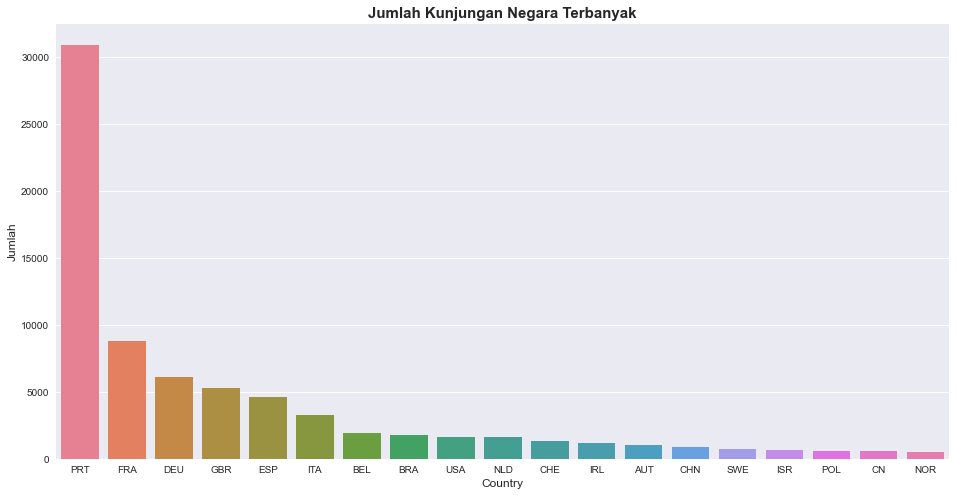

In [41]:
# visualisasi
plt.figure(figsize=(16,8))
sns.barplot(x="country", y="counts", palette="husl", data=df[df["counts"]>=df["counts"].mean()])
plt.title("Jumlah Kunjungan Negara Terbanyak", fontsize=15, weight="bold")
plt.xlabel("Country", fontsize=12)
plt.ylabel("Jumlah", fontsize=12)

##### B.  Berapa harga room per night? Ada perbedaan hargakah?


In [35]:
# Membuat data frame baru untuk menampilkan kolom HargaPermalam/Orang
data_harga = data[["adults", "children", "babies", "adr","reserved_room_type", "is_canceled"]].copy()
data_harga["Total_Orang"] = data_harga["adults"] + data_harga["children"] + data_harga["babies"]
data_harga = data_harga.loc[data_harga["Total_Orang"] != 0]
data_harga["HargaPerMalam/Orang"] = data_harga["adr"]/data_harga["Total_Orang"]
data_harga

,adults,children,babies,adr,reserved_room_type,is_canceled,Total_Orang,HargaPerMalam/Orang
0,1,0.0,0,0.00,A,0,1.0,0.000000
1,2,0.0,0,76.50,A,1,2.0,38.250000
2,1,0.0,0,68.00,A,1,1.0,68.000000
3,2,0.0,0,76.50,A,1,2.0,38.250000
4,2,0.0,0,76.50,A,1,2.0,38.250000
...,...,...,...,...,...,...,...,...
79325,2,0.0,0,96.14,A,0,2.0,48.070000
79326,3,0.0,0,225.43,E,0,3.0,75.143333
79327,2,0.0,0,157.71,D,0,2.0,78.855000
79328,2,0.0,0,104.40,A,0,2.0,52.200000


In [36]:
print("Rata-Rata Harga Per-Malam Per Orang yaitu :", data_harga["HargaPerMalam/Orang"].mean())

Rata-Rata Harga Per-Malam Per Orang yaitu : 58.380907705038695


Text(0, 0.5, 'Harga Room per Night per Orang')

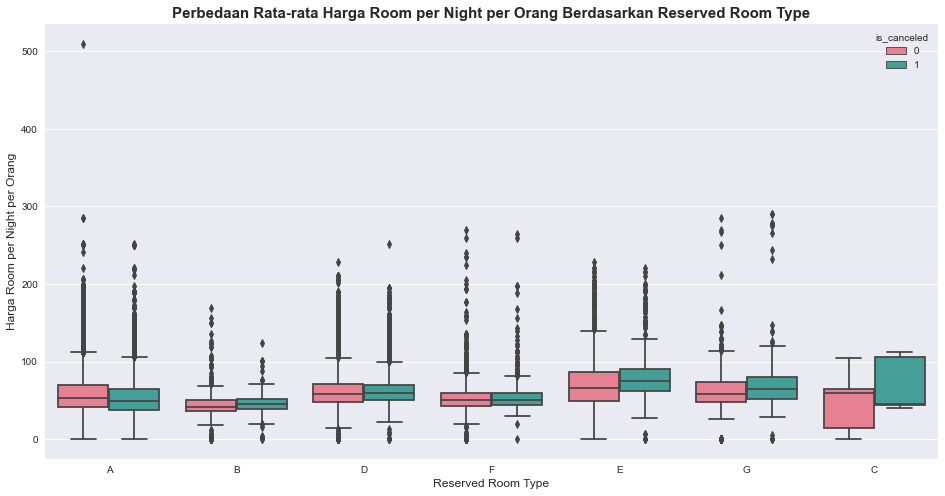

In [42]:
# visualisasi harga per malam per orang berdasarkan tipe room yang dipesan
plt.figure(figsize=(16,8))
sns.boxplot(x="reserved_room_type", hue="is_canceled", y="HargaPerMalam/Orang", palette="husl", data=data_harga)
plt.title("Perbedaan Rata-rata Harga Room per Night per Orang Berdasarkan Reserved Room Type", fontsize=15, weight="bold" )
plt.xlabel("Reserved Room Type", fontsize=12)
plt.ylabel("Harga Room per Night per Orang", fontsize=12)

##### C. Berapa lama tamu tinggal di hotel?

In [43]:
#membuat kolom baru untuk Total malam
data["Total_Malam"] = data["stays_in_weekend_nights"] + data["stays_in_week_nights"]

In [44]:
data["Total_Malam"].unique()

array([ 2,  4,  6,  3,  5,  7,  9, 10, 20,  1,  8, 11,  0, 15, 17, 29, 13,
       19, 12, 14, 24, 16, 30, 27, 23, 22, 26, 21, 25, 48, 18, 28, 33, 49,
       57, 34, 43], dtype=int64)

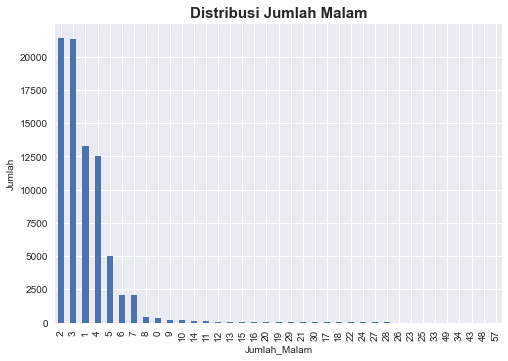

In [56]:
# visualisasi jumlah malam
plt.figure()
plt.title("Distribusi Jumlah Malam", fontsize=15,weight="bold")
plt.xlabel("Jumlah_Malam", fontsize=10)
plt.ylabel("Jumlah", fontsize=10)
data['Total_Malam'].value_counts().plot(kind = 'bar')

##### D. Ada Market Segmen?

Text(0, 0.5, 'Count')

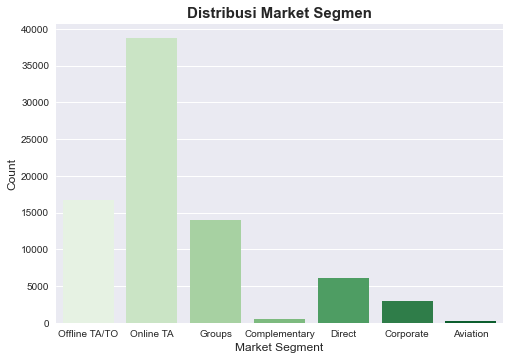

In [57]:
plt.figure()
sns.countplot(data["market_segment"], palette="Greens")
plt.title("Distribusi Market Segmen", fontsize=15,weight="bold")
plt.xlabel('Market Segment', fontsize=12)
plt.ylabel('Count', fontsize=12)

##### E. Berapa banyak booking yang dicancel/tidak dicancel?

In [58]:
data["is_canceled"].value_counts()
df3 = pd.DataFrame(data["is_canceled"].value_counts().reset_index())
df3.rename(columns={"index": "Canlel=1/Tidak=0", "is_canceled": "counts"}, inplace=True)
df3["persentase"] = (df3["counts"]/df3["counts"].sum())*100
df3

,Canlel=1/Tidak=0,counts,persentase
0,0,46226,58.29109
1,1,33076,41.70891


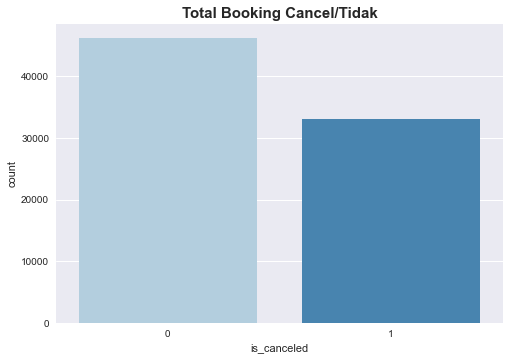

In [59]:
#visualisasi
plt.title("Total Booking Cancel/Tidak", fontsize=15,weight="bold")
sns.countplot(data["is_canceled"], palette="Blues")

## Model Building dan Hyperparameter Tuning

### Encode and Scaling

In [63]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler

In [64]:
data

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,Total_Malam
0,City Hotel,0,0.009539,2015,July,27,1,0.000,0.048780,0.25,0.0,0.0,HB,PRT,Offline TA/TO,TA/TO,0,0.0,0.0,0,0,0,No Deposit,6.0,0.0,0,Transient,0.000000,0.0,0.0,Check-Out,2015-07-03,2
1,City Hotel,1,0.139905,2015,July,27,1,0.000,0.097561,0.50,0.0,0.0,BB,PRT,Online TA,TA/TO,0,0.0,0.0,0,0,0,No Deposit,9.0,0.0,0,Transient,0.150000,0.0,0.2,Canceled,2015-07-01,4
2,City Hotel,1,0.103339,2015,July,27,1,0.000,0.097561,0.25,0.0,0.0,BB,PRT,Online TA,TA/TO,0,0.0,0.0,0,0,0,No Deposit,9.0,0.0,0,Transient,0.133333,0.0,0.2,Canceled,2015-04-30,4
3,City Hotel,1,0.146264,2015,July,27,1,0.125,0.097561,0.50,0.0,0.0,BB,PRT,Online TA,TA/TO,0,0.0,0.0,0,0,0,No Deposit,9.0,0.0,0,Transient,0.150000,0.0,0.4,Canceled,2015-06-23,6
4,City Hotel,1,0.158983,2015,July,27,2,0.000,0.048780,0.50,0.0,0.0,BB,PRT,Online TA,TA/TO,0,0.0,0.0,0,0,0,No Deposit,9.0,0.0,0,Transient,0.150000,0.0,0.2,Canceled,2015-04-02,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79325,City Hotel,0,0.036566,2017,August,35,30,0.125,0.121951,0.50,0.0,0.0,BB,BEL,Offline TA/TO,TA/TO,0,0.0,0.0,0,0,0,No Deposit,394.0,0.0,0,Transient,0.188510,0.0,0.0,Check-Out,2017-09-06,7
79326,City Hotel,0,0.162162,2017,August,35,31,0.125,0.121951,0.75,0.0,0.0,BB,FRA,Online TA,TA/TO,0,0.0,0.0,4,4,0,No Deposit,9.0,0.0,0,Transient,0.442020,0.0,0.4,Check-Out,2017-09-07,7
79327,City Hotel,0,0.054054,2017,August,35,31,0.125,0.121951,0.50,0.0,0.0,BB,DEU,Online TA,TA/TO,0,0.0,0.0,3,3,0,No Deposit,9.0,0.0,0,Transient,0.309235,0.0,0.8,Check-Out,2017-09-07,7
79328,City Hotel,0,0.173291,2017,August,35,31,0.125,0.121951,0.50,0.0,0.0,BB,GBR,Online TA,TA/TO,0,0.0,0.0,0,0,0,No Deposit,89.0,0.0,0,Transient,0.204706,0.0,0.0,Check-Out,2017-09-07,7


In [65]:
LE = LabelEncoder()
scaler = MinMaxScaler()

In [66]:
#Skalling
KOLOM = ["lead_time","adults","babies","children","adr","previous_bookings_not_canceled","previous_cancellations",
         "required_car_parking_spaces","stays_in_weekend_nights","stays_in_week_nights","total_of_special_requests"]
for i in KOLOM :
    data[i] = scaler.fit_transform(np.array(data[i]).reshape(-1,1))

In [67]:
# Encoding
data["assigned_room_type"] = LE.fit_transform(data["assigned_room_type"])
data["reserved_room_type"] = LE.fit_transform(data["reserved_room_type"])

In [77]:
data_full = pd.get_dummies(data, columns=['arrival_date_month', 'customer_type', 'deposit_type', 'distribution_channel',
                                          'market_segment','meal'],prefix=['ADM','CT', 'DT',"DC","MS","M"])


In [78]:
data_full.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,country,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,Total_Malam,ADM_April,ADM_August,ADM_December,ADM_February,ADM_January,ADM_July,ADM_June,ADM_March,ADM_May,ADM_November,ADM_October,ADM_September,CT_Contract,CT_Group,CT_Transient,CT_Transient-Party,DT_No Deposit,DT_Non Refund,DT_Refundable,DC_Corporate,DC_Direct,DC_GDS,DC_TA/TO,MS_Aviation,MS_Complementary,MS_Corporate,MS_Direct,MS_Groups,MS_Offline TA/TO,MS_Online TA,M_BB,M_FB,M_HB,M_SC
0,City Hotel,0,0.009539,2015,27,1,0.000,0.048780,0.25,0.0,0.0,PRT,0,0.0,0.0,0,0,0,6.0,0.0,0,0.000000,0.0,0.0,Check-Out,2015-07-03,2,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0
1,City Hotel,1,0.139905,2015,27,1,0.000,0.097561,0.50,0.0,0.0,PRT,0,0.0,0.0,0,0,0,9.0,0.0,0,0.150000,0.0,0.2,Canceled,2015-07-01,4,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0
2,City Hotel,1,0.103339,2015,27,1,0.000,0.097561,0.25,0.0,0.0,PRT,0,0.0,0.0,0,0,0,9.0,0.0,0,0.133333,0.0,0.2,Canceled,2015-04-30,4,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0
3,City Hotel,1,0.146264,2015,27,1,0.125,0.097561,0.50,0.0,0.0,PRT,0,0.0,0.0,0,0,0,9.0,0.0,0,0.150000,0.0,0.4,Canceled,2015-06-23,6,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0
4,City Hotel,1,0.158983,2015,27,2,0.000,0.048780,0.50,0.0,0.0,PRT,0,0.0,0.0,0,0,0,9.0,0.0,0,0.150000,0.0,0.2,Canceled,2015-04-02,2,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0


In [79]:
data_full = data_full.drop(columns=["agent","Total_Malam", "arrival_date_week_number",
                                    "arrival_date_day_of_month","arrival_date_year","company",
                                    "country","reservation_status","reservation_status_date","hotel"])
data_full

,is_canceled,lead_time,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,ADM_April,ADM_August,ADM_December,ADM_February,ADM_January,ADM_July,ADM_June,ADM_March,ADM_May,ADM_November,ADM_October,ADM_September,CT_Contract,CT_Group,CT_Transient,CT_Transient-Party,DT_No Deposit,DT_Non Refund,DT_Refundable,DC_Corporate,DC_Direct,DC_GDS,DC_TA/TO,MS_Aviation,MS_Complementary,MS_Corporate,MS_Direct,MS_Groups,MS_Offline TA/TO,MS_Online TA,M_BB,M_FB,M_HB,M_SC
0,0,0.009539,0.000,0.048780,0.25,0.0,0.0,0,0.0,0.0,0,0,0,0,0.000000,0.0,0.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0
1,1,0.139905,0.000,0.097561,0.50,0.0,0.0,0,0.0,0.0,0,0,0,0,0.150000,0.0,0.2,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0
2,1,0.103339,0.000,0.097561,0.25,0.0,0.0,0,0.0,0.0,0,0,0,0,0.133333,0.0,0.2,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0
3,1,0.146264,0.125,0.097561,0.50,0.0,0.0,0,0.0,0.0,0,0,0,0,0.150000,0.0,0.4,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0
4,1,0.158983,0.000,0.048780,0.50,0.0,0.0,0,0.0,0.0,0,0,0,0,0.150000,0.0,0.2,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79325,0,0.036566,0.125,0.121951,0.50,0.0,0.0,0,0.0,0.0,0,0,0,0,0.188510,0.0,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0
79326,0,0.162162,0.125,0.121951,0.75,0.0,0.0,0,0.0,0.0,4,4,0,0,0.442020,0.0,0.4,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0
79327,0,0.054054,0.125,0.121951,0.50,0.0,0.0,0,0.0,0.0,3,3,0,0,0.309235,0.0,0.8,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0
79328,0,0.173291,0.125,0.121951,0.50,0.0,0.0,0,0.0,0.0,0,0,0,0,0.204706,0.0,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0


In [80]:
x = data_full.drop("is_canceled", axis=1)
y = data_full["is_canceled"]

In [81]:
x

,lead_time,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,ADM_April,ADM_August,ADM_December,ADM_February,ADM_January,ADM_July,ADM_June,ADM_March,ADM_May,ADM_November,ADM_October,ADM_September,CT_Contract,CT_Group,CT_Transient,CT_Transient-Party,DT_No Deposit,DT_Non Refund,DT_Refundable,DC_Corporate,DC_Direct,DC_GDS,DC_TA/TO,MS_Aviation,MS_Complementary,MS_Corporate,MS_Direct,MS_Groups,MS_Offline TA/TO,MS_Online TA,M_BB,M_FB,M_HB,M_SC
0,0.009539,0.000,0.048780,0.25,0.0,0.0,0,0.0,0.0,0,0,0,0,0.000000,0.0,0.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0
1,0.139905,0.000,0.097561,0.50,0.0,0.0,0,0.0,0.0,0,0,0,0,0.150000,0.0,0.2,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0
2,0.103339,0.000,0.097561,0.25,0.0,0.0,0,0.0,0.0,0,0,0,0,0.133333,0.0,0.2,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0
3,0.146264,0.125,0.097561,0.50,0.0,0.0,0,0.0,0.0,0,0,0,0,0.150000,0.0,0.4,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0
4,0.158983,0.000,0.048780,0.50,0.0,0.0,0,0.0,0.0,0,0,0,0,0.150000,0.0,0.2,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79325,0.036566,0.125,0.121951,0.50,0.0,0.0,0,0.0,0.0,0,0,0,0,0.188510,0.0,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0
79326,0.162162,0.125,0.121951,0.75,0.0,0.0,0,0.0,0.0,4,4,0,0,0.442020,0.0,0.4,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0
79327,0.054054,0.125,0.121951,0.50,0.0,0.0,0,0.0,0.0,3,3,0,0,0.309235,0.0,0.8,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0
79328,0.173291,0.125,0.121951,0.50,0.0,0.0,0,0.0,0.0,0,0,0,0,0.204706,0.0,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0


### Train Test Data

In [82]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=41)

In [83]:
y_train.value_counts()

0    36970
1    26471
Name: is_canceled, dtype: int64

### Modelling

In [84]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

###### --Logistic Regression--

In [85]:
# Modelling and evaluation
LR = LogisticRegression(random_state=41) 
LR.fit(x_train, y_train) 
ypred_LR = LR.predict(x_test)

              precision    recall  f1-score   support

           0       0.77      0.92      0.84      9256
           1       0.85      0.62      0.72      6605

    accuracy                           0.80     15861
   macro avg       0.81      0.77      0.78     15861
weighted avg       0.81      0.80      0.79     15861



Text(0.5, 1.0, 'CONFUSION MATRIX FOR LOGREG')

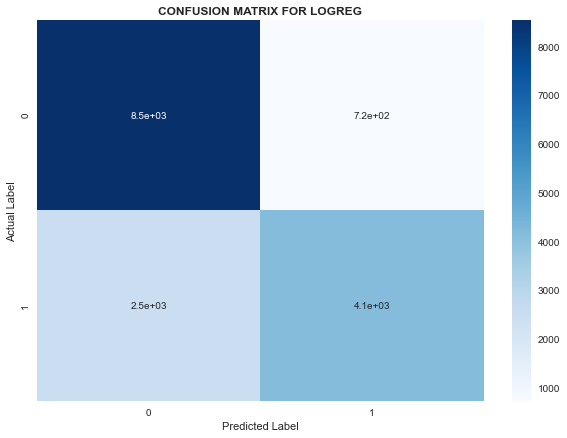

In [138]:
print(classification_report(y_test, ypred_LR))
plt.figure(figsize=(10,7))
sns.heatmap(confusion_matrix(y_test, ypred_LR), annot = True, cmap="Blues")
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.title("CONFUSION MATRIX FOR LOGREG",weight="bold")

###### --Random Forest--

In [139]:
RF = RandomForestClassifier(random_state=41)
RF.fit(x_train, y_train)
ypred_RF = RF.predict(x_test)

              precision    recall  f1-score   support

           0       0.85      0.91      0.88      9256
           1       0.86      0.78      0.82      6605

    accuracy                           0.86     15861
   macro avg       0.86      0.85      0.85     15861
weighted avg       0.86      0.86      0.85     15861



Text(0.5, 1.0, 'CONFUSION MATRIX FOR RANDOM FOREST')

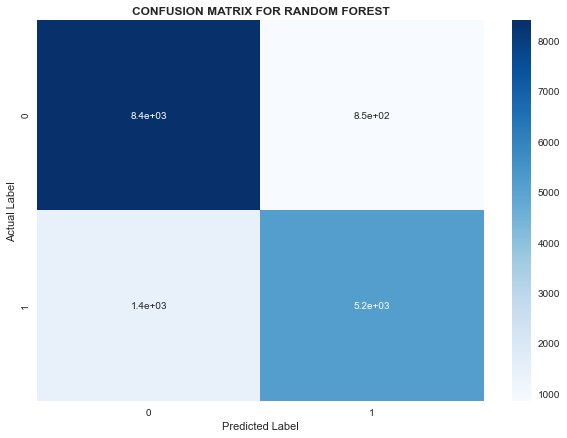

In [140]:
print(classification_report(y_test, ypred_RF))
plt.figure(figsize=(10,7))
sns.heatmap(confusion_matrix(y_test, ypred_RF), annot = True, cmap="Blues")
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.title("CONFUSION MATRIX FOR RANDOM FOREST",weight="bold")

(array([0.        , 0.09226448, 1.        ]),
 array([0.        , 0.78258895, 1.        ]),
 array([2, 1, 0], dtype=int64),
 0.8451622353354528)

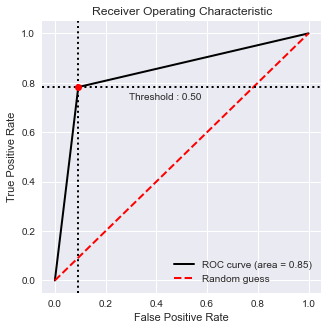

In [141]:
from plot_metric.functions import BinaryClassification
# Menampilkan ROC
bc = BinaryClassification(y_test, ypred_RF, labels=["Class 0", "Class 1"])
plt.figure(figsize=(5,5))
bc.plot_roc_curve()

###### --KNN--

In [142]:
x_train.shape
k = round(len(x_train) ** 0.5)
k

252

In [143]:
KNN = KNeighborsClassifier(n_neighbors = (k+1))
KNN.fit(x_train, y_train)
ypred_KNN = KNN.predict(x_test)

              precision    recall  f1-score   support

           0       0.78      0.91      0.84      9256
           1       0.84      0.63      0.72      6605

    accuracy                           0.80     15861
   macro avg       0.81      0.77      0.78     15861
weighted avg       0.80      0.80      0.79     15861



Text(0.5, 1.0, 'CONFUSION MATRIX FOR KNN')

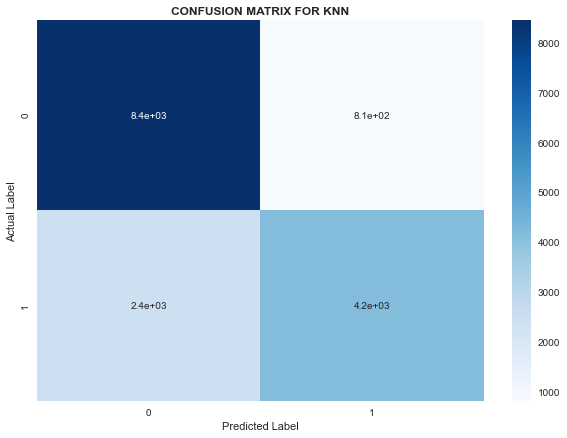

In [144]:
print(classification_report(y_test, ypred_KNN))
plt.figure(figsize=(10,7))
sns.heatmap(confusion_matrix(y_test, ypred_KNN), annot = True, cmap="Blues")
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.title("CONFUSION MATRIX FOR KNN",weight="bold")

###### --SVM--

In [64]:
SVM = SVC(random_state=41)
SVM.fit(x_train, y_train)
ypred_SVM = SVM.predict(x_test)

              precision    recall  f1-score   support

           0       0.70      1.00      0.82      9256
           1       0.99      0.39      0.56      6605

    accuracy                           0.74     15861
   macro avg       0.84      0.69      0.69     15861
weighted avg       0.82      0.74      0.71     15861



Text(0.5, 1.0, 'CONFUSION MATRIX FOR SVM')

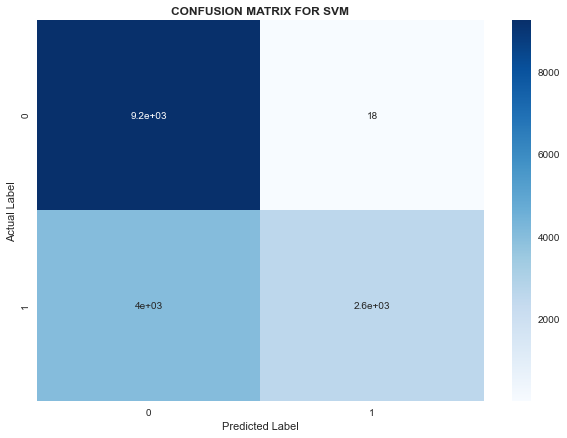

In [65]:
print(classification_report(y_test, ypred_SVM))
plt.figure(figsize=(10,7))
sns.heatmap(confusion_matrix(y_test, ypred_SVM), annot = True, cmap="Blues")
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.title("CONFUSION MATRIX FOR SVM",weight="bold")

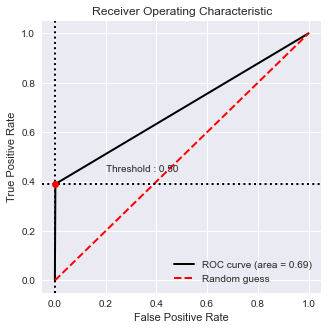

In [66]:
# Menampilkan ROC
bc = BinaryClassification(y_test, ypred_SVM, labels=["Class 0", "Class 1"])
plt.figure(figsize=(5,5))
bc.plot_roc_curve()
plt.show()

### Hyperparameter Tuning

In [64]:
from sklearn.model_selection import RandomizedSearchCV 

###### --Ligistic Regression--

In [132]:
LR = LogisticRegression(random_state=41) 
param_LR = {'C': [1.0, 2.0, 4.0, 6.0, 8.0, 10.0],
            'penalty' : ['l1', 'l2', 'elasticnet'],
            'solver' : ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
            'multi_class' : ['auto', 'ovr', 'multinomial'],
            'n_jobs' : [-1]
           }
search_LR = RandomizedSearchCV(LR, param_LR, cv=5, return_train_score=False)
search_LR.fit(x, y)
search_LR.best_estimator_

LogisticRegression(C=6.0, multi_class='ovr', n_jobs=-1, penalty='l1',
                   random_state=41, solver='liblinear')

Modelling

In [69]:
new_LR = LogisticRegression(C=6.0, multi_class='ovr', n_jobs=-1, penalty='l1', random_state=41, solver='liblinear')
new_LR.fit(x_train, y_train) 
ypred_new_LR = new_LR.predict(x_test)

              precision    recall  f1-score   support

           0       0.79      0.92      0.85      9256
           1       0.85      0.66      0.74      6605

    accuracy                           0.81     15861
   macro avg       0.82      0.79      0.80     15861
weighted avg       0.82      0.81      0.80     15861



Text(0.5, 1.0, 'CONFUSION MATRIX FOR NEW LOGREG')

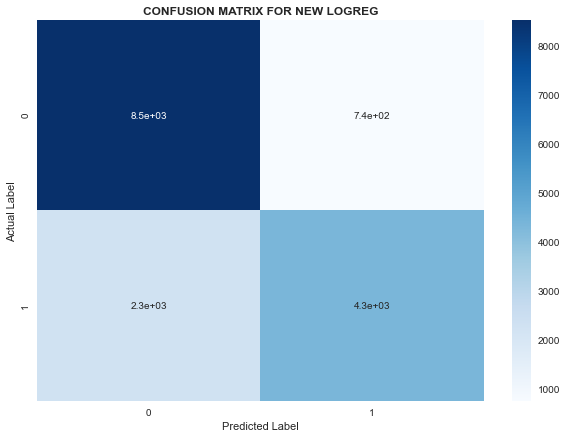

In [70]:
print(classification_report(y_test, ypred_new_LR))
plt.figure(figsize=(10,7))
sns.heatmap(confusion_matrix(y_test, ypred_new_LR), annot = True, cmap="Blues")
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.title("CONFUSION MATRIX FOR NEW LOGREG",weight="bold")

###### -- Random Forest--

In [66]:
RF = RandomForestClassifier(random_state=41)
param_RF =  {'n_estimators': [i for i in range(1,100,5)],
             'criterion' : ['gini', 'entropy'],
             'max_features' : ['auto', 'sqrt', 'log2'],
             'n_jobs' : [-1]
            }

search_RF = RandomizedSearchCV(RF, param_RF, cv=5, return_train_score=False)
search_RF.fit(x, y)
search_RF.best_estimator_

RandomForestClassifier(criterion='entropy', max_features='sqrt',
                       n_estimators=76, n_jobs=-1, random_state=41)

In [67]:
new_RF = RandomForestClassifier(criterion='entropy', max_features='sqrt',
                       n_estimators=76, n_jobs=-1, random_state=41)
new_RF.fit(x_train, y_train)
ypred_new_RF = new_RF.predict(x_test)

              precision    recall  f1-score   support

           0       0.85      0.92      0.88      9256
           1       0.87      0.78      0.82      6605

    accuracy                           0.86     15861
   macro avg       0.86      0.85      0.85     15861
weighted avg       0.86      0.86      0.86     15861



Text(0.5, 1.0, 'CONFUSION MATRIX FOR NEW RANDOM FOREST')

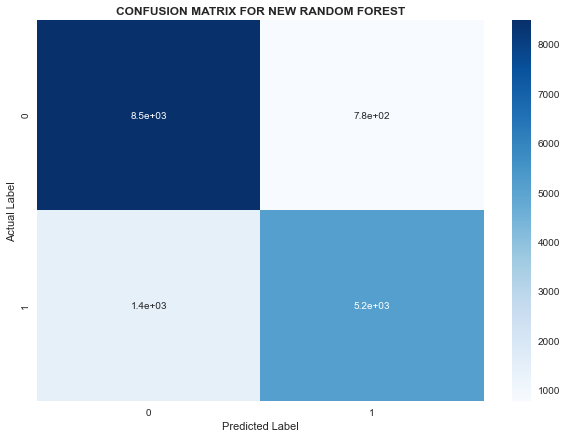

In [68]:
print(classification_report(y_test, ypred_new_RF))
plt.figure(figsize=(10,7))
sns.heatmap(confusion_matrix(y_test, ypred_new_RF), annot = True, cmap="Blues")
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.title("CONFUSION MATRIX FOR NEW RANDOM FOREST",weight="bold")

### MODEL EVALUATION
Kesalahan yang berpengaruh terhadap kerugian perusahaan adalah pada saat ML memprediksi tidak cancel booking (0) tetapi aktualnya melakukan cansel booking (1). Jelas, jika hal ini ternjadi, maka perusahaan hotel akan kehilangan keuntungan. Artinya, untuk menghindari kondisi ini, kita harus membuat si False Negatif FN sekecil mungkin. Berdasarkan rumus, jika kita ingin nilai FN sekecil mungkin, maka nilai dari recall 1 dan precision 0 harus dipilih yang setinggi mungkin untuk dapat meningkatkan performa ML.Random Forest (Best_Parameter) memberikan nilai recall 1 dan precision 0 paling besar

## FINISHED